**Importing all necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**1. Reading both datasets**

In [ ]:
train_df = pd.read_table('training_set.tsv', sep = "\t", header = 0)

In [ ]:
bench_df = pd.read_table('benchmark_set.tsv', sep = "\t", header = 0)

**2. Creating a distribution plot (histo) for SP length protein**

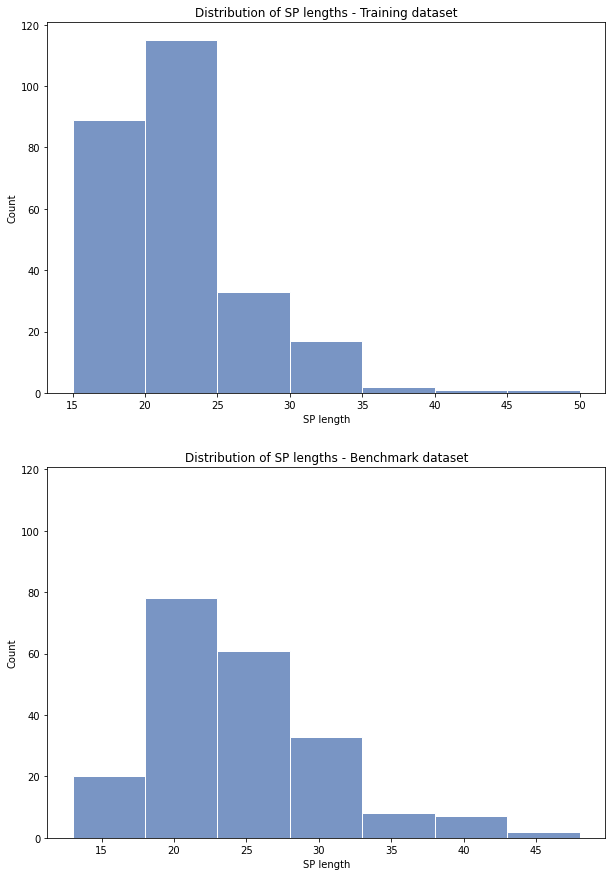

In [ ]:
#! two plots should have the same range of frequency in order to better understand the difference in distributions
#half peptides should be in the range of 20-25 length, in both datasets (median of the distribution)
#short fragments are more frequent in the training set, due to change (sampling error) - only if the two distributions are really different.
#in this case the distributions are not so different
#two distr are comparable, and the avg in terms of length is similar, ie the data collection was good enough. 
#discuss the these points in the report 
train_df_sp = train_df.query('Class=="SP"')['SP cleavage-site annotation'].str.count('S') #train df SP (series)
bench_df_sp = bench_df.query('Class=="SP"')['SP cleavage-site annotation'].str.count('S') #bench df SP (series)

#plotting
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10, 15), sharey=True) 
sns.set_theme(style="ticks")
sns.histplot(data=train_df_sp, binwidth=5, ax=ax1).set(title='Distribution of SP lengths - Training dataset', xlabel='SP length')
sns.histplot(data=bench_df_sp, binwidth=5, ax=ax2).set(title='Distribution of SP lengths - Benchmark dataset', xlabel='SP length')
plt.show()

**3. Comparing amino acid composition of SP proteins with background composition of proteins found in SwissProt**

In [ ]:
#creating a dict of the aa background compo
aa_list=['A','Q','L','S','R','E','K','T','N','G','M','W','D','H','F','Y','C','I','P','V']
aa_background_comp = [8.25,3.93,9.65,6.64,5.53,6.72,5.80,5.35,4.06,7.07,2.41,1.10,5.46,2.27,3.86,2.92,1.38,5.91,4.74,6.86]

In [ ]:
#training set
train_sp_length=train_df.query('Class=="SP"')['SP cleavage-site annotation'].str.count('S').tolist() #list containing all the SP length of prot in order
#creating a new column in the df with the sequence of the SP
for n in train_sp_length:
  train_df['SP sequence'] = train_df.query('Class=="SP"')['Sequence (first 50 N-terminal residues)'].str[:n+1]
#creating a new column to store the previous results
for aa, n in zip(aa_list, train_sp_length):
  train_df[aa] = train_df.query('Class=="SP"')['SP sequence'].str.count(aa)/n

In [ ]:
#benchmark set
bench_sp_length = bench_df.query('Class=="SP"')['SP cleavage-site annotation'].str.count('S').tolist()
#i create a new column in the dataframe with the sequence of the SP
for n in bench_sp_length:
  bench_df['SP sequence'] = bench_df.query('Class=="SP"')['Sequence (first 50 N-terminal residues)'].str[:n+1]
#i create a new column for each aa with the freq in the SP
for aa,n in zip(aa_list, bench_sp_length):
  bench_df[aa] = bench_df.query('Class=="SP"')['SP sequence'].str.count(aa)/n

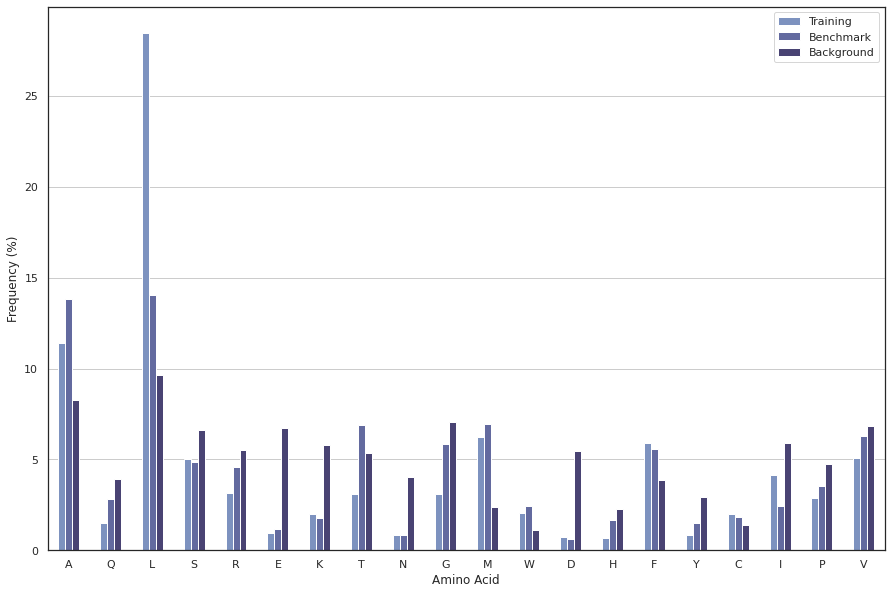

In [ ]:
#creating the lists
train_aa_comp_list = []
for aa in aa_list:
  train_aa_comp_list.append(train_df[aa].mean()*100)
bench_aa_comp_list = []
for aa in aa_list:
  bench_aa_comp_list.append(bench_df[aa].mean()*100)

#converting each list into an array
aa_array = np.array(aa_list)
train_aa_comp_array = np.array(train_aa_comp_list)
bench_aa_comp_array = np.array(bench_aa_comp_list)
aa_background_comp_array = np.array(aa_background_comp)
comp = pd.DataFrame(data=[train_aa_comp_array, bench_aa_comp_array, aa_background_comp_array], columns=aa_array, index=['Training', 'Benchmark', 'Background']).transpose()

#plotting
sns.set_theme(style='white')
colors = sns.color_palette("ch:s=.25,rot=-.25")[2:5]
ax = comp.plot.bar(figsize=(15, 10), ylabel='Frequency (%)', color=colors, xlabel='Amino Acid', rot=0)
ax.grid(axis='y')
plt.show()

In [ ]:
#comment: L and A are the most representative res in the signal peptides (apolar res in general). it does make sense because it is part of the hydrophobic core of the signal peptide. 
#vice versa, the polar res are not so frequent for the same reason. 

**4. Taxonomic classification of both Taxa and Kingdom using pie charts**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fda830f9890>],
      dtype=object)

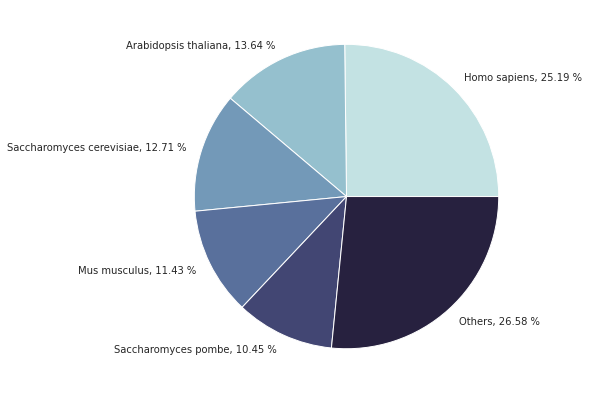

In [ ]:
#training set 
#counting how many prot we have in the more relevant taxas
train_df['Taxa'].value_counts().head(n=5) #top best 9 more representative taxas count
train_df['Taxa'].value_counts().iloc[5:].sum() #counting all other taxas
#creating a dict to build a new df
train_taxas = {'Homo sapiens': 434, 'Arabidopsis thaliana': 235, 'Saccharomyces cerevisiae': 219, 'Mus musculus': 197, 'Saccharomyces pombe': 180, 'Others': 458}
train_taxas_df = pd.DataFrame(train_taxas, index=['Count']).transpose()
#plotting
colors = sns.color_palette("ch:start=.2,rot=-.3")
percents = train_taxas_df.to_numpy() * 100 / train_taxas_df.to_numpy().sum() #computing their % wrt the whole chart
legend = ['%s, %1.2f %%' % (idx, percentage) for idx, percentage in zip(train_taxas_df.index, percents)]
font = {'fontname': 'Times New Roman'}
train_taxas_df.plot.pie(figsize=(7,7), subplots=True, labels=legend, ylabel=' ', colors=colors, legend=False, fontsize=10)

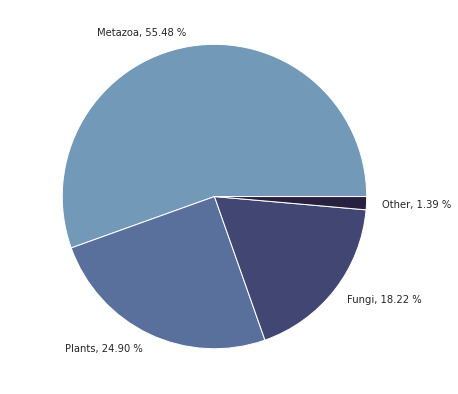

In [ ]:
#kingdom pie chart
colors = sns.color_palette("ch:start=.2,rot=-.3")[2:]
percents = train_df['Kingdom'].value_counts().to_numpy() * 100 / train_df['Kingdom'].value_counts().to_numpy().sum() #computing their % wrt the whole chart
legend = ['%s, %1.2f %%' % (idx, percentage) for idx, percentage in zip(train_df['Kingdom'].unique(), percents)]
train_df['Kingdom'].value_counts().plot.pie(figsize=(7,7), colors=colors, labels=legend, ylabel=' ', fontsize=10)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fda8499c1d0>],
      dtype=object)

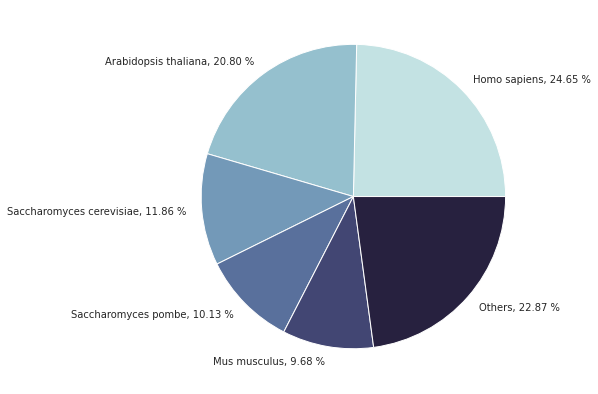

In [ ]:
#bench set
#counting how many prot we have in the more relevant taxas
bench_df['Taxa'].value_counts().head(n=5) #top best 5 more representative taxas count
bench_df['Taxa'].value_counts().iloc[5:].sum() #counting all other taxas
#creating a dict to build a new df
bench_taxas = {'Homo sapiens': 1838, 'Arabidopsis thaliana': 1551, 'Saccharomyces cerevisiae': 884, 'Saccharomyces pombe': 755, 'Mus musculus': 722, 'Others': 1705}
bench_taxas_df = pd.DataFrame(bench_taxas, index=['Count']).transpose()
#plotting
colors = sns.color_palette("ch:start=.2,rot=-.3")
percents = bench_taxas_df.to_numpy() * 100 / bench_taxas_df.to_numpy().sum() #computing their % wrt the whole chart
legend = ['%s, %1.2f %%' % (idx, percentage) for idx, percentage in zip(bench_taxas_df.index, percents)]
bench_taxas_df.plot.pie(subplots=True, figsize=(7,7), colors=colors, labels=legend, ylabel=' ', legend=False, fontsize=10) 

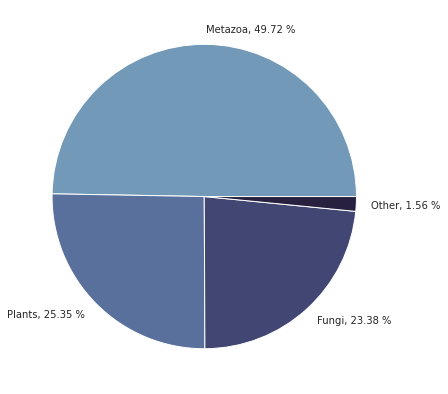

In [ ]:
#kingdom pie chart
colors = sns.color_palette("ch:start=.2,rot=-.3")[2:]
percents = bench_df['Kingdom'].value_counts().to_numpy() * 100 / bench_df['Kingdom'].value_counts().to_numpy().sum() #computing their % wrt the whole chart
legend = ['%s, %1.2f %%' % (idx, percentage) for idx, percentage in zip(bench_df['Kingdom'].unique(), percents)]
bench_df['Kingdom'].value_counts().plot.pie(figsize=(7,7), colors=colors, labels=legend, ylabel='', fontsize=10)
plt.show()

In [ ]:
#add the % of each piece of pie. also remove the names from the chart, just have a color-correspondance by color through the legend. 

**5. Sequence logos of SP cleavage site**

In [ ]:
#training set
train_sp_seq = list(train_df.query('Class=="SP"')['Sequence (first 50 N-terminal residues)'])
train_align_site = []
for length, seq in zip(train_sp_length, train_sp_seq):
  train_align_site.append(seq[length - 13:length + 2])
  print(seq[length - 13:length + 2])

TFLLLALSTAAQAEP
FIMALFIAVESSPIF
FLAICLSLTVALAAE
LSLLFTLLSLSQSTN
ISLALLLMIGVESVR
IIFPNEFSKPTRAFS
LFSTATLISTGWGLD
ILLQFSAWTTTDAVT
LLCLAAVLRQSFGNV
VIAFSTVHQTVAAVD
LLLLLASVSLALGDP
GALFLALLAGAHAEF
FSLALLLMTGVESVR
DPIAEIERSNCKIAH
VLTVLLMGTGCISAP
FLTLVSFSNMSDQAG
LLLLAGLAHGASALF
ALLVLLFCFRGRAGP
ISFALLLMKGVESVR
VALLFSHVDHISAET
LLWASLLSGVLAGRA
WALLLLWSPCTFSLP
IVVLLLVIAFSHGAV
FLLFLIATTRGWSTD
VLLVSCFLSQGAAIE
LLFLVLSAGSGISGP
LLALALILPGTLCAE
LVLIAFTCYTCSDAT
IFLVLLVATSAYAAP
TLVLFLLAQVSWAGP
SVFFLLLPGPSAADE
LPILAAVLQQSSGNV
ILLLLSLVASIFSTP
LLFLVLSAGSGFTQG
QSLTVSRGGLVAADR
LVVTIVCLDLASTMI
LPPLLLTPRAGDAAV
ASLVFFLCQMISALD
VAMSLVSCSTAAPAK
LLALLLLAAAAEAAK
VFVFCFLIKLLTGEL
FLAVSLLCALANAYP
VLALLLLCSYTCGSQ
LGLFLLLPRPVPAPC
FVLLLSEIVSISASS
WFAIATLITICYAAK
LWLPTSGLWTVQAMD
CLMLAGLCSLVTSHL
CAVLALVLAPAGAFR
LLILACFVALALARA
LVAVFLICETLVAQR
LTAIAALAARAAAVG
LALFLAAPWGVDCGY
ISCLLLIGIVVECKE
FLVVATSLSGTEAGF
LLAGLLCGGGVWAAR
LLWLLLGVAGVWASR
CLAGLAFVSETAAVH
YLLFNAMTALTEEAA
LLVVFLSLSGTAADC
FLASLAMASPAKRGG
AALVITLFVLVLAID
FLLLALLA

In [ ]:
#benching set
bench_sp_seq = list(bench_df.query('Class=="SP"')['Sequence (first 50 N-terminal residues)'])
bench_align_site = []
for length, seq in zip(bench_sp_length, bench_sp_seq):
  bench_align_site.append(seq[length - 13:length + 2]) 
  print(seq[length - 13:length + 2])

LTLFAVLIGSASAVY
ILLMVVVLALSSAQD
FLVCAFWIPDSRGMP
LLLHAAFHGGALGEK
CLSVASLVSYAGAAS
FLLLVAAPRWVLSQL
IILFASILAAISATS
LLILVSLAALAHAES
FLSAALSLWPTSGEI
LFLAAVAGALVYAED
MERANHSLVRMRREG
ALCFVLLVGFAAACQ
LLLLAGLALVGEART
YVWPLLLCSPCLLIQ
FFLSCSFVSLVSSEK
LLWASLLSGVLAGRA
MLLLCLGVPTGRPYN
LLLLLPPPPRVGGFN
LLLGLQLFAKAWSYN
AALISVSLSGTLANR
ALMVAAGGCVVSAFN
LLLGPCAAPPAWALN
TLLCIASLALLAAFN
RVLLLTALTLCHGFN
LALSQGILNCCLAYN
LFVCSMIIGICEGRE
LVAGVVAVSAALASK
VLLASVLWVTVRSQQ
VIMTIMPDMKVEAVS
FLVIMVISSLVDCAK
LLTISDFLFLSLTFS
LLLALLTLGLAAQHQ
LLTLLTQDTGSWAQS
PVLALAFGSLAAAAP
ALCCGLLAASAHAGY
WLLLAALLGCTLAEE
RILAIVFAARHVAAL
AAFLFLSWTHCRALP
LAHQHHQHKEEKRAV
LAVVIFIINDVSSQG
LLAFLHSASLLNGDS
LALFGFLWEASGGLD
LLQLLLLVGPGGCLN
LLLLPLLMLRAAALH
FIVTMLIVDEVNSFK
LVVGLAAVAGVDGAT
VICMVVIAPMAEAAL
IAFALCLHHLISAIE
LSLALLGIQVARSAI
VFVTLRVIAAVISEE
VAACFSLCGPLLSAR
WLLLLALPAVCSALP
SLLLLLEPQISQGLV
IFLIAYLACTALTHD
LWLLTLLLALSQALP
LLLLAVAVPLSQAGV
ALLLLQAVGPAVAAK
LLLLLLQVPAGSAET
AFIVLASIHDSQSRF
LLIVVCILDHSEGAR
LALWLGAVGVGVAEL
LLLLLLYAAVAGASK
TALFFCGI

In [ ]:
#weblogo: better to change the logo bits, so that it is more extended (up to 2). 
#comment: signal peptide are typically build with stretches of L, which are no usually observed in other parts of the protein. the res close to the cleavage site has a conserved motif, which include an A/V followed by another res, and then another A (AxA motif), then the cleavae site. 
#this is a very small motif, so it is not significantly enough to discriminate for sure the cleavage site (as the same motif because of its size can be found in other parts of the protein)
